In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bitarray.util import urandom

## Point Function
[Distributed Point Function](https://en.wikipedia.org/wiki/Distributed_point_function) is a point function similar to a [delta function](https://en.wikipedia.org/wiki/Kronecker_delta) except the output can be equal to any value at the point. A point function is defined as:

$$P_{x,y}(x) = y$$
$$P_{x,y}(x') = 0$$

For all $x' \neq x$. 

<BarContainer object of 32 artists>

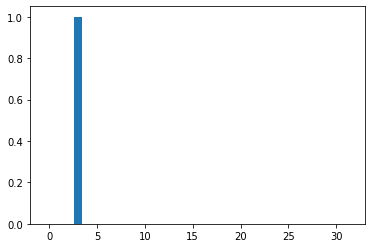

In [2]:
# Simple Point Function (PF) with 32 elements and P(3) = 1
x = 3
y = 1
DOMAIN_SIZE = 32

# Define the PF
P = np.zeros(DOMAIN_SIZE)
P[x] = y

plt.bar(np.arange(DOMAIN_SIZE), P)

## Distributed Point Function: 2 Parties


In [3]:
# Assume that y = 1
def Gen(x):
    # Generate a random key for k0
    k0 = urandom(DOMAIN_SIZE)
    
    # Derive k1 from k0 by flipping the bit that corresponds to x
    k1 = k0.copy()
    k1[x] = not k1[x]
    return (k0, k1)

def Eval(k, x):
    return k[x]

<BarContainer object of 32 artists>

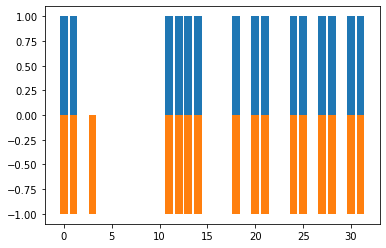

In [4]:
k0, k1 = Gen(x=3)

eval0_output = np.zeros(DOMAIN_SIZE)
eval1_output = np.zeros(DOMAIN_SIZE)
for i in range(DOMAIN_SIZE):
    eval0_output[i] = Eval(k=k0, x=i)
    eval1_output[i] = Eval(k=k1, x=i)

# Observe that the point function looks random from an Eval perspective    
# I have flipped eval1 to highlight that the outputs are symmetric apart from the point which is different
plt.bar(np.arange(DOMAIN_SIZE), eval0_output)
plt.bar(np.arange(DOMAIN_SIZE), -eval1_output) 

In [5]:
# Eval is to be done separately by each party (no communication of eval should be done between parties)
# We will evaluate the function at x=3 (the point), this should yield y=1
eval0 = Eval(k=k1, x=3)
eval1 = Eval(k=k0, x=3)

# Taking the XOR of the two evaluations will reveal the value of the function at x=3
assert eval0 ^ eval1 == 1


# We will evaluate the function at x=10 (not the point), this should yield 0
eval0 = Eval(k=k1, x=10)
eval1 = Eval(k=k0, x=10)

assert eval0 ^ eval1 == 0

## Private Information Retrieval (PIR): Set inclusion

In [6]:
# We will check for set inclusion on the set w
w = {3, 4, 5}

# Initialize the evaluations to 0 (could be 1 as well as long as they are the same)
eval0, eval1 = 0, 0 
for element in w:
    eval0 ^= Eval(k=k0, x=element)
    eval1 ^= Eval(k=k1, x=element)

# The set w contains 3 and the point function is 1 at 3
# This is essentially a privacy preserving test for inclusion as both parties do not
# know what value they are checking for in the set w
assert eval0 ^ eval1 == 1 

# If we alter the set w to not contain the point, the evaluation will be 0
w = {4, 5}
eval0, eval1 = 0, 0
for element in w:
    eval0 ^= Eval(k=k0, x=element)
    eval1 ^= Eval(k=k1, x=element)

assert eval0 ^ eval1 == 0